# Vulnerability and Housing Prices

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
"""County Demographics - taken from https://opendata.maryland.gov/Demographic/Choose-Maryland-Compare-Counties-Demographics/pa7d-u6hs"""
county_demographics = pd.read_csv("county_demographics.csv")
county_demographics.head()

County  Total Population, 2018  Total Population, 2010  \
0   Baltimore City                  602495                  620961   
1         Wicomico                  103195                   98733   
2       St. Mary's                  112664                  105151   
3         Somerset                   25675                   26470   
4  Prince George's                  909308                  863420   

   Total Population, 2000  Population Change, 2000-2010  \
0                  651262                        -30301   
1                   84638                         14095   
2                   86196                         18955   
3                   24746                          1724   
4                  801091                         62329   

   Population Density per Square Mile  Median Age  \
0                              7671.5        35.6   
1                               263.7        35.9   
2                               294.4        36.8   
3                                82.8        37.4   
4                              1788.8        37.5   

   Per Capita Personal Income ($ Dollars)  \
0                                   49168   
1                                   40896   
2                                   54921   
3                                   31327   
4                                   47365   

   Median Household Income ($ Dollars)  Total Personal Income ($ Thousands)  
0                                46762                             30073681  
1                                52341                              4209176  
2                                82433                              6187732  
3                                40320                               811937  
4                                80858                             43232981

In [4]:
"""Socioeconomic Characteristics per County - taken from https://opendata.maryland.gov/Demographic/Maryland-Jurisdictions-Socioeconomic-Characteristi/v67y-zu4n"""
county_socioeconomic = pd.read_csv("county_socioeconomic.csv")
county_socioeconomic.head()

Jurisdictions  Total Households  Population 25 years and older  \
0      Allegany County             28167                          50793   
1  Anne Arundel County            204829                         382657   
2     Baltimore County            312826                         569088   
3       Calvert County             31479                          60627   
4      Caroline County             12010                          22037   

   Less than 9th Grade  High School no Diploma  High School Diploma  \
0                 1454                    4089                21302   
1                 8852                   22100                93862   
2                18308                   33161               154724   
3                 1065                    3001                18704   
4                 1291                    2389                 9207   

   Some College no degree  Associates degree  Bachelor's degree  \
0                    9999               4825               4733   
1                   78474              28736              88157   
2                  111102              40101             121891   
3                   15532               4570              10038   
4                    4171               1608               2112   

   Graduate or Professional                ...                   Male  Female  \
0                      4391                ...                  38077   34983   
1                     62476                ...                 276842  282895   
2                     89801                ...                 391102  434564   
3                      7717                ...                  44966   45561   
4                      1259                ...                  15822   16831   

   White Alone  Black Alone  Asian Alone  American Indian/Alaska Native Alone  \
0        64695         6021          580                                  118   
1       416331        89001        20103                                 1222   
2       519063       226879        47772                                 2110   
3        73873        11124         1371                                   77   
4        26419         4411          187                                   30   

   Native Hawaiian/Pacific Islander Alone  Some Other Race Alone  \
0                                      34                    167   
1                                     383                  12470   
2                                     394                   7828   
3                                       0                    530   
4                                      16                    623   

   Two or More Races  Hispanic or Latino (of any race)  
0               1445                              1233  
1              20227                             39402  
2              21620                             40850  
3               3552                              3092  
4                967                              2101  

[5 rows x 41 columns]

In [5]:
"""County Vulnerability - taken from https://svi.cdc.gov"""
county_vulnerability = pd.read_csv("county_vulnerability.csv")
county_vulnerability.head()

FID  ST     STATE ST_ABBR        COUNTY   FIPS  \
0    0  24  MARYLAND      MD  Anne Arundel  24003   
1    1  24  MARYLAND      MD     Baltimore  24005   
2    2  24  MARYLAND      MD       Calvert  24009   
3    3  24  MARYLAND      MD       Carroll  24013   
4    4  24  MARYLAND      MD         Cecil  24015   

                        LOCATION   AREA_SQMI  E_TOTPOP  M_TOTPOP    ...     \
0  Anne Arundel County, Maryland  414.887094  559737.0       0.0    ...      
1     Baltimore County, Maryland  598.361844  825666.0       0.0    ...      
2       Calvert County, Maryland  213.197148   90527.0       0.0    ...      
3       Carroll County, Maryland  447.600142  167535.0       0.0    ...      
4         Cecil County, Maryland  346.276658  102175.0       0.0    ...      

   F_CROWD  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  M_UNINSUR  \
0      0.0      0.0       0.0       0.0      0.0    32248.0     1853.0   
1      0.0      0.0       0.0       0.0      0.0    60233.0     2259.0   
2      0.0      0.0       0.0       0.0      0.0     5327.0      744.0   
3      0.0      0.0       0.0       0.0      0.0     7249.0      711.0   
4      0.0      0.0       0.0       0.0      0.0     7107.0      782.0   

   EP_UNINSUR  MP_UNINSUR  E_DAYPOP  
0         6.0         0.3  553075.0  
1         7.4         0.3  821710.0  
2         6.0         0.8   67719.0  
3         4.4         0.4  137277.0  
4         7.0         0.8   85648.0  

[5 rows x 124 columns]

In [6]:
"""New Construction - taken from https://opendata.maryland.gov/Housing/Maryland-Total-New-Parcels-For-Residential-Develop/6umw-84d2"""
county_development = pd.read_csv("county_development.csv")
county_development.head()

Date created  Year  MARYLAND  Allegany County  Anne Arundel County  \
0    5/15/2017  2015      9712               16                 1625   
1    5/15/2017  2013     10346               32                 1359   
2    5/15/2017  2006     19814              137                 1604   
3    5/15/2017  2008     10380              112                 1160   
4    5/15/2017  2012      8599               62                 1171   

   Baltimore City  Baltimore County  Calvert County  Caroline County  \
0             268               918             118               12   
1             237               715             269               27   
2             328              1813             393              321   
3             239               728             234               76   
4              84               648             264               25   

   Carroll County        ...         Kent County  Montgomery County  \
0             428        ...                  38               1186   
1             359        ...                  40               1624   
2             654        ...                 149               1429   
3             251        ...                  71                963   
4             290        ...                  22               1079   

   Prince George's County  Queen Anne's County  Somerset County  \
0                    1746                  180               29   
1                    1384                  187               12   
2                    2920                  376              167   
3                    1473                  205               93   
4                     979                  160               18   

   St. Mary's County  Talbot County  Washington County  Wicomico County  \
0                160             52                191              135   
1                444             33                223               97   
2                868            287               1086              719   
3                624            172                356              282   
4                489             43                142              123   

   Worcester County  
0                62  
1                92  
2               821  
3               328  
4                83  

[5 rows x 27 columns]

In [7]:
"""Find if more vulnerability is correlated to less development"""

'Find if vulnerability is correlated to less development'

In [8]:
print(county_demographics.shape)
merge_name_demo = "County"

(24, 10)


In [9]:
print(county_socioeconomic.shape)
merge_name_socio = "Jurisdicions"

(24, 41)


In [10]:
print(county_vulnerability.shape)
merge_name_vuln = "COUNTY"

(24, 124)


In [11]:
"""Because data is from 2012 to 2016, the average data has been taken in this context"""

county_development = county_development.sort_values("Year")
county_2012_data = county_development.loc[(county_development["Year"] >= 2012)]
county_12_16_avg = county_2012_data.groupby("Date created").mean()
county_melt = county_12_16_avg.melt()

county_melt

#Regex out the vals for this

variable    value
0                     Year  2013.50
1                 MARYLAND  9710.75
2          Allegany County    31.75
3      Anne Arundel County  1455.00
4           Baltimore City   185.25
5         Baltimore County   772.25
6           Calvert County   221.25
7          Caroline County    23.25
8           Carroll County   330.00
9             Cecil County   164.75
10          Charles County   729.75
11       Dorchester County    38.25
12        Frederick County   555.00
13          Garrett County    70.00
14          Harford County   446.00
15           Howard County   967.75
16             Kent County    35.25
17       Montgomery County  1328.25
18  Prince George's County  1345.25
19     Queen Anne's County   181.00
20         Somerset County    21.00
21       St. Mary's County   373.25
22           Talbot County    43.75
23       Washington County   191.50
24         Wicomico County   110.00
25        Worcester County    91.25

In [139]:
dc_development = pd.read_csv("dc_development.csv")
dc_residential = dc_development.loc[(dc_development["PROJECTTYPE"] == "RESIDENTIAL")]
print(dc_residential.info())

"""Count of DC residential productions is 60 in 2014. We're taking this to mean about 60 residential construction projects in 2014, given this context"""

DC_projects_dict = {"variable":["District of Columbia"], "value":["60.0"]}

dc_projects_data = pd.DataFrame.from_dict(DC_projects_dict)

dc_projects_data

"""Add the DC data to the residential parcels data."""

mass_projects_index = pd.concat([dc_projects_data, county_melt])

print(mass_projects_index)

mass_projects_index.to_csv("mass_projects_index.csv") # headed to get cleaned in openrefine.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 70 to 215
Data columns (total 13 columns):
OBJECTID            60 non-null int64
PROJECTNAME         60 non-null object
LOCATION            60 non-null object
WARD                60 non-null int64
DEVELOPER           60 non-null object
ARCHITECT           60 non-null object
STATUS              60 non-null object
UNITS               60 non-null float64
TYPE                60 non-null object
SQFT                0 non-null float64
ESTVALUEINMILION    54 non-null float64
ESTDELIVERY         60 non-null object
PROJECTTYPE         60 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 4.7+ KB
None
                  variable    value
0     District of Columbia     60.0
0                     Year   2013.5
1                 MARYLAND  9710.75
2          Allegany County    31.75
3      Anne Arundel County     1455
4           Baltimore City   185.25
5         Baltimore County   772.25
6           Calvert County   221.

In [12]:
"""Changed values to match that of main index later on"""

mass_project_index = pd.read_csv("mass_projects_index_cleaned.csv") #Cleaned out the counties

mass_project_index

Unnamed: 0              variable    value
0            0  District of Columbia    60.00
1            1              MARYLAND  9710.75
2            2              Allegany    31.75
3            3          Anne Arundel  1455.00
4            4        Baltimore City   185.25
5            5             Baltimore   772.25
6            6               Calvert   221.25
7            7              Caroline    23.25
8            8               Carroll   330.00
9            9                 Cecil   164.75
10          10               Charles   729.75
11          11            Dorchester    38.25
12          12             Frederick   555.00
13          13               Garrett    70.00
14          14               Harford   446.00
15          15                Howard   967.75
16          16                  Kent    35.25
17          17            Montgomery  1328.25
18          18       Prince George's  1345.25
19          19          Queen Anne's   181.00
20          20              Somerset    21.00
21          21            St. Mary's   373.25
22          22                Talbot    43.75
23          23            Washington   191.50
24          24              Wicomico   110.00
25          25             Worcester    91.25

# Vulnerability Index

In [13]:
"""DC Vulnerability - taken from https://svi.cdc.gov"""
dc_vulnerability = pd.read_csv("dc_vulnerability.csv")

dc_vulnerability

FID  ST                 STATE ST_ABBR                COUNTY   FIPS  \
0    0  11  DISTRICT OF COLUMBIA      DC  District of Columbia  11001   

                                     LOCATION  AREA_SQMI  E_TOTPOP  M_TOTPOP  \
0  District of Columbia, District of Columbia   61.14504  659009.0       0.0   

     ...      F_CROWD  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  \
0    ...       -999.0   -999.0    -999.0    -999.0   -999.0    33419.0   

   M_UNINSUR  EP_UNINSUR  MP_UNINSUR   E_DAYPOP  
0     1818.0         5.2         0.3  1134734.0  

[1 rows x 124 columns]

In [14]:
"""Merging county vulnerability and DC vulnerability to compare"""
county_combined_vulnerability = pd.concat([dc_vulnerability, county_vulnerability])

In [15]:
county_combined_vulnerability.head()

FID  ST                 STATE ST_ABBR                COUNTY   FIPS  \
0    0  11  DISTRICT OF COLUMBIA      DC  District of Columbia  11001   
0    0  24              MARYLAND      MD          Anne Arundel  24003   
1    1  24              MARYLAND      MD             Baltimore  24005   
2    2  24              MARYLAND      MD               Calvert  24009   
3    3  24              MARYLAND      MD               Carroll  24013   

                                     LOCATION   AREA_SQMI  E_TOTPOP  M_TOTPOP  \
0  District of Columbia, District of Columbia   61.145040  659009.0       0.0   
0               Anne Arundel County, Maryland  414.887094  559737.0       0.0   
1                  Baltimore County, Maryland  598.361844  825666.0       0.0   
2                    Calvert County, Maryland  213.197148   90527.0       0.0   
3                    Carroll County, Maryland  447.600142  167535.0       0.0   

     ...      F_CROWD  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  \
0    ...       -999.0   -999.0    -999.0    -999.0   -999.0    33419.0   
0    ...          0.0      0.0       0.0       0.0      0.0    32248.0   
1    ...          0.0      0.0       0.0       0.0      0.0    60233.0   
2    ...          0.0      0.0       0.0       0.0      0.0     5327.0   
3    ...          0.0      0.0       0.0       0.0      0.0     7249.0   

   M_UNINSUR  EP_UNINSUR  MP_UNINSUR   E_DAYPOP  
0     1818.0         5.2         0.3  1134734.0  
0     1853.0         6.0         0.3   553075.0  
1     2259.0         7.4         0.3   821710.0  
2      744.0         6.0         0.8    67719.0  
3      711.0         4.4         0.4   137277.0  

[5 rows x 124 columns]

In [16]:
mass_index = county_combined_vulnerability[["COUNTY", "E_MUNIT", "E_CROWD", "E_NOVEH", "E_GROUPQ"]]
#Combine data of parcel data

In [17]:
mass_index

COUNTY   E_MUNIT  E_CROWD   E_NOVEH  E_GROUPQ
0   District of Columbia  140304.0   9930.0  100656.0   39967.0
0           Anne Arundel   28410.0   3264.0    8089.0   16092.0
1              Baltimore   62724.0   5144.0   24879.0   20798.0
2                Calvert    1447.0    389.0    1309.0     650.0
3                Carroll    3818.0    396.0    2687.0    3479.0
4                  Cecil    2477.0    583.0    1733.0    1550.0
5              Frederick   10028.0   1354.0    4445.0    4624.0
6                Harford   10081.0    985.0    4552.0    1951.0
7           Queen Anne's     380.0    253.0     535.0     464.0
8             Washington    5428.0   1065.0    4594.0    8858.0
9                Garrett     619.0     92.0     886.0     596.0
10            St. Mary's    2956.0    414.0    2109.0    2870.0
11                Talbot     579.0     62.0     921.0     399.0
12              Wicomico    4958.0    957.0    2609.0    4102.0
13               Charles    3560.0    650.0    1874.0    2137.0
14            Dorchester     985.0    125.0    1249.0     580.0
15                Howard   19807.0   2135.0    3974.0    2133.0
16              Caroline     253.0    275.0     843.0     507.0
17                  Kent     569.0     63.0     902.0    1634.0
18            Montgomery  102947.0  10973.0   28388.0    8787.0
19             Worcester   19814.0    216.0    1490.0     753.0
20              Allegany    1835.0    254.0    3126.0    7644.0
21       Prince George's   75968.0  11812.0   27760.0   18893.0
22        Baltimore City   48374.0   4969.0   71257.0   24258.0
23              Somerset     767.0     80.0    1030.0    6572.0

In [18]:
mass_index = mass_index.merge(county_demographics[["County", "Total Population, 2018", "Population Density per Square Mile","Median Household Income ($ Dollars)"]], left_on = "COUNTY", right_on = "County", how = "inner" )

In [19]:
mass_index.head()

COUNTY  E_MUNIT  E_CROWD  E_NOVEH  E_GROUPQ        County  \
0  Anne Arundel  28410.0   3264.0   8089.0   16092.0  Anne Arundel   
1     Baltimore  62724.0   5144.0  24879.0   20798.0     Baltimore   
2       Calvert   1447.0    389.0   1309.0     650.0       Calvert   
3       Carroll   3818.0    396.0   2687.0    3479.0       Carroll   
4         Cecil   2477.0    583.0   1733.0    1550.0         Cecil   

   Total Population, 2018  Population Density per Square Mile  \
0                  576031                              1295.9   
1                  828431                              1345.5   
2                   92003                               416.3   
3                  168429                               373.4   
4                  102826                               292.0   

   Median Household Income ($ Dollars)  
0                                96133  
1                                73309  
2                               100000  
3                                92890  
4                                72259

In [20]:
#mass_index = county_combined_vulnerability[["COUNTY", "E_MUNIT", "E_CROWD", "E_NOVEH", "E_GROUPQ"]]
#Combine data of parcel data

In [21]:
mass_index

COUNTY   E_MUNIT  E_CROWD  E_NOVEH  E_GROUPQ           County  \
0      Anne Arundel   28410.0   3264.0   8089.0   16092.0     Anne Arundel   
1         Baltimore   62724.0   5144.0  24879.0   20798.0        Baltimore   
2           Calvert    1447.0    389.0   1309.0     650.0          Calvert   
3           Carroll    3818.0    396.0   2687.0    3479.0          Carroll   
4             Cecil    2477.0    583.0   1733.0    1550.0            Cecil   
5         Frederick   10028.0   1354.0   4445.0    4624.0        Frederick   
6           Harford   10081.0    985.0   4552.0    1951.0          Harford   
7      Queen Anne's     380.0    253.0    535.0     464.0     Queen Anne's   
8        Washington    5428.0   1065.0   4594.0    8858.0       Washington   
9           Garrett     619.0     92.0    886.0     596.0          Garrett   
10       St. Mary's    2956.0    414.0   2109.0    2870.0       St. Mary's   
11           Talbot     579.0     62.0    921.0     399.0           Talbot   
12         Wicomico    4958.0    957.0   2609.0    4102.0         Wicomico   
13          Charles    3560.0    650.0   1874.0    2137.0          Charles   
14       Dorchester     985.0    125.0   1249.0     580.0       Dorchester   
15           Howard   19807.0   2135.0   3974.0    2133.0           Howard   
16         Caroline     253.0    275.0    843.0     507.0         Caroline   
17             Kent     569.0     63.0    902.0    1634.0             Kent   
18       Montgomery  102947.0  10973.0  28388.0    8787.0       Montgomery   
19        Worcester   19814.0    216.0   1490.0     753.0        Worcester   
20         Allegany    1835.0    254.0   3126.0    7644.0         Allegany   
21  Prince George's   75968.0  11812.0  27760.0   18893.0  Prince George's   
22   Baltimore City   48374.0   4969.0  71257.0   24258.0   Baltimore City   
23         Somerset     767.0     80.0   1030.0    6572.0         Somerset   

    Total Population, 2018  Population Density per Square Mile  \
0                   576031                              1295.9   
1                   828431                              1345.5   
2                    92003                               416.3   
3                   168429                               373.4   
4                   102826                               292.0   
5                   255648                               353.5   
6                   253956                               560.1   
7                    50251                               128.5   
8                   150926                               322.1   
9                    29163                                46.5   
10                  112664                               294.4   
11                   36968                               140.7   
12                  103195                               263.7   
13                  161503                               320.2   
14                   31998                                60.3   
15                  323196                              1144.9   
16                   33304                               103.5   
17                   19383                                72.9   
18                 1052567                              1978.2   
19                   51823                               109.9   
20                   70975                               177.0   
21                  909308                              1788.8   
22                  602495                              7671.5   
23                   25675                                82.8   

    Median Household Income ($ Dollars)  
0                                 96133  
1                                 73309  
2                                100000  
3                                 92890  
4                                 72259  
5                                 91727  
6                                 80922  
7                                 90696  
8                                

In [22]:
"""Building up the DC row based on current data"""

DC_row = dc_vulnerability[["COUNTY", "E_MUNIT", "E_CROWD", "E_NOVEH", "E_GROUPQ"]]

DC_row.insert(5, "County", "District of Columbia")
DC_row.insert(6, "Total Population, 2018", 702445)
DC_row.insert(7, "Population Density per Square Mile", 11506.0)
DC_row.insert(8, "Median Household Income ($ Dollars)", 77649)

"""From Wikipedia.org: information about DC

Population Density: 11506.0
Total Population (2018): 702445
Median Household Income: 77649

"""

'From Wikipedia.org: information about DC\n\nPopulation Density: 11506.0\nTotal Population (2018): 702445\nMedian Household Income: 77649\n\n'

In [23]:
DC_row

COUNTY   E_MUNIT  E_CROWD   E_NOVEH  E_GROUPQ  \
0  District of Columbia  140304.0   9930.0  100656.0   39967.0   

                 County  Total Population, 2018  \
0  District of Columbia                  702445   

   Population Density per Square Mile  Median Household Income ($ Dollars)  
0                             11506.0                                77649

In [24]:
mass_index = pd.concat([mass_index, DC_row])

In [25]:
mass_index = mass_index.reset_index()

In [26]:
mass_index.tail()

index                COUNTY   E_MUNIT  E_CROWD   E_NOVEH  E_GROUPQ  \
20     20              Allegany    1835.0    254.0    3126.0    7644.0   
21     21       Prince George's   75968.0  11812.0   27760.0   18893.0   
22     22        Baltimore City   48374.0   4969.0   71257.0   24258.0   
23     23              Somerset     767.0     80.0    1030.0    6572.0   
24      0  District of Columbia  140304.0   9930.0  100656.0   39967.0   

                  County  Total Population, 2018  \
20              Allegany                   70975   
21       Prince George's                  909308   
22        Baltimore City                  602495   
23              Somerset                   25675   
24  District of Columbia                  702445   

    Population Density per Square Mile  Median Household Income ($ Dollars)  
20                               177.0                                42564  
21                              1788.8                                80858  
22                              7671.5                                46762  
23                                82.8                                40320  
24                             11506.0                                77649

In [27]:
mass_index.head()

index        COUNTY  E_MUNIT  E_CROWD  E_NOVEH  E_GROUPQ        County  \
0      0  Anne Arundel  28410.0   3264.0   8089.0   16092.0  Anne Arundel   
1      1     Baltimore  62724.0   5144.0  24879.0   20798.0     Baltimore   
2      2       Calvert   1447.0    389.0   1309.0     650.0       Calvert   
3      3       Carroll   3818.0    396.0   2687.0    3479.0       Carroll   
4      4         Cecil   2477.0    583.0   1733.0    1550.0         Cecil   

   Total Population, 2018  Population Density per Square Mile  \
0                  576031                              1295.9   
1                  828431                              1345.5   
2                   92003                               416.3   
3                  168429                               373.4   
4                  102826                               292.0   

   Median Household Income ($ Dollars)  
0                                96133  
1                                73309  
2                               100000  
3                                92890  
4                                72259

In [42]:
mass_index_changed = mass_index.merge(mass_project_index, left_on = "COUNTY", right_on ="variable",)

#Value will be the number of new residential parcels for development.

In [43]:
mass_index_changed

index                COUNTY   E_MUNIT  E_CROWD   E_NOVEH  E_GROUPQ  \
0       0          Anne Arundel   28410.0   3264.0    8089.0   16092.0   
1       1             Baltimore   62724.0   5144.0   24879.0   20798.0   
2       2               Calvert    1447.0    389.0    1309.0     650.0   
3       3               Carroll    3818.0    396.0    2687.0    3479.0   
4       4                 Cecil    2477.0    583.0    1733.0    1550.0   
5       5             Frederick   10028.0   1354.0    4445.0    4624.0   
6       6               Harford   10081.0    985.0    4552.0    1951.0   
7       7          Queen Anne's     380.0    253.0     535.0     464.0   
8       8            Washington    5428.0   1065.0    4594.0    8858.0   
9       9               Garrett     619.0     92.0     886.0     596.0   
10     10            St. Mary's    2956.0    414.0    2109.0    2870.0   
11     11                Talbot     579.0     62.0     921.0     399.0   
12     12              Wicomico    4958.0    957.0    2609.0    4102.0   
13     13               Charles    3560.0    650.0    1874.0    2137.0   
14     14            Dorchester     985.0    125.0    1249.0     580.0   
15     15                Howard   19807.0   2135.0    3974.0    2133.0   
16     16              Caroline     253.0    275.0     843.0     507.0   
17     17                  Kent     569.0     63.0     902.0    1634.0   
18     18            Montgomery  102947.0  10973.0   28388.0    8787.0   
19     19             Worcester   19814.0    216.0    1490.0     753.0   
20     20              Allegany    1835.0    254.0    3126.0    7644.0   
21     21       Prince George's   75968.0  11812.0   27760.0   18893.0   
22     22        Baltimore City   48374.0   4969.0   71257.0   24258.0   
23     23              Somerset     767.0     80.0    1030.0    6572.0   
24      0  District of Columbia  140304.0   9930.0  100656.0   39967.0   

                  County  Total Population, 2018  \
0           Anne Arundel                  576031   
1              Baltimore                  828431   
2                Calvert                   92003   
3                Carroll                  168429   
4                  Cecil                  102826   
5              Frederick                  255648   
6                Harford                  253956   
7           Queen Anne's                   50251   
8             Washington                  150926   
9                Garrett                   29163   
10            St. Mary's                  112664   
11                Talbot                   36968   
12              Wicomico                  103195   
13               Charles                  161503   
14            Dorchester                   31998   
15                Howard                  323196   
16              Caroline                   33304   
17                  Kent                   19383   
18            Montgomery                 1052567   
19             Worcester                   51823   
20              Allegany                   70975   
21       Prince George's                  909308   
22        Baltimore City                  602495   
23              Somerset                   25675   
24  District of Columbia                  702445   

    Population Density per Square Mile  Median Household Income ($ Dollars)  \
0                               1295.9                                96133   
1                               1345.5                                73309   
2                                416.3                               100000   
3                                373.4                                92890   
4                                292.0                                72259   
5                                353.5                                91727   
6                                560.1                                80922   
7                                128.5                                90696   
8              

In [44]:
index = mass_index_changed

In [45]:
index_cols = list(index.columns)

print(index_cols)

index.drop(['index','County', 'variable'], axis = 1, inplace = True)

['index', 'COUNTY', 'E_MUNIT', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ', 'County', 'Total Population, 2018', 'Population Density per Square Mile', 'Median Household Income ($ Dollars)', 'Unnamed: 0', 'variable', 'value']


In [46]:
index_backup = index

In [47]:
index_backup = index_backup.drop(index_backup.columns[8], axis=1)

In [48]:
"""Renaming columns for easier access and clarity"""

index_backup.columns = ["County", "Large_Unt", "Crowded_Unt", "No_Vehicle", "Group_Unt", "Pop_Total", "Pop_Dens", "Median_Inc", "Res_Parcel"]

In [49]:
"""Final Variable tables are taking shape"""

index = index_backup

index

County  Large_Unt  Crowded_Unt  No_Vehicle  Group_Unt  \
0           Anne Arundel    28410.0       3264.0      8089.0    16092.0   
1              Baltimore    62724.0       5144.0     24879.0    20798.0   
2                Calvert     1447.0        389.0      1309.0      650.0   
3                Carroll     3818.0        396.0      2687.0     3479.0   
4                  Cecil     2477.0        583.0      1733.0     1550.0   
5              Frederick    10028.0       1354.0      4445.0     4624.0   
6                Harford    10081.0        985.0      4552.0     1951.0   
7           Queen Anne's      380.0        253.0       535.0      464.0   
8             Washington     5428.0       1065.0      4594.0     8858.0   
9                Garrett      619.0         92.0       886.0      596.0   
10            St. Mary's     2956.0        414.0      2109.0     2870.0   
11                Talbot      579.0         62.0       921.0      399.0   
12              Wicomico     4958.0        957.0      2609.0     4102.0   
13               Charles     3560.0        650.0      1874.0     2137.0   
14            Dorchester      985.0        125.0      1249.0      580.0   
15                Howard    19807.0       2135.0      3974.0     2133.0   
16              Caroline      253.0        275.0       843.0      507.0   
17                  Kent      569.0         63.0       902.0     1634.0   
18            Montgomery   102947.0      10973.0     28388.0     8787.0   
19             Worcester    19814.0        216.0      1490.0      753.0   
20              Allegany     1835.0        254.0      3126.0     7644.0   
21       Prince George's    75968.0      11812.0     27760.0    18893.0   
22        Baltimore City    48374.0       4969.0     71257.0    24258.0   
23              Somerset      767.0         80.0      1030.0     6572.0   
24  District of Columbia   140304.0       9930.0    100656.0    39967.0   

    Pop_Total  Pop_Dens  Median_Inc  Res_Parcel  
0      576031    1295.9       96133     1455.00  
1      828431    1345.5       73309      772.25  
2       92003     416.3      100000      221.25  
3      168429     373.4       92890      330.00  
4      102826     292.0       72259      164.75  
5      255648     353.5       91727      555.00  
6      253956     560.1       80922      446.00  
7       50251     128.5       90696      181.00  
8      150926     322.1       59828      191.50  
9       29163      46.5       46899       70.00  
10     112664     294.4       82433      373.25  
11      36968     140.7       70620       43.75  
12     103195     263.7       52341      110.00  
13     161503     320.2       94478      729.75  
14      31998      60.3       47011       38.25  
15     323196    1144.9      111576      967.75  
16      33304     103.5       56338       23.25  
17      19383      72.9       57760       35.25  
18    1052567    1978.2      102944     1328.25  
19      51823     109.9       61405       91.25  
20      70975     177.0       42564       31.75  
21     909308    1788.8       80858     1345.25  
22     602495    7671.5       46762      185.25  
23      25675      82.8       40320       21.00  
24     702445   11506.0       77649       60.00

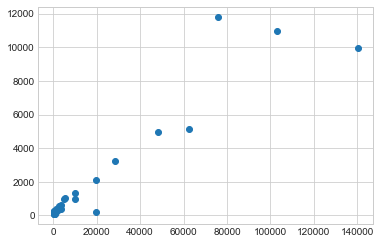

In [224]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(index["Large_Unt"], index["Crowded_Unt"])

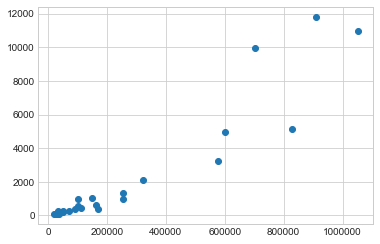

In [225]:
plt.scatter(index["Pop_Total"], index["Crowded_Unt"])

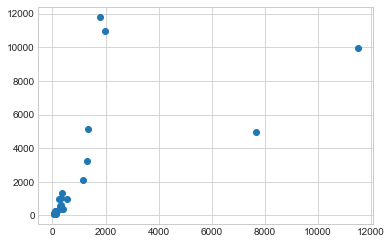

In [226]:
plt.scatter(index["Pop_Dens"], index["Crowded_Unt"])

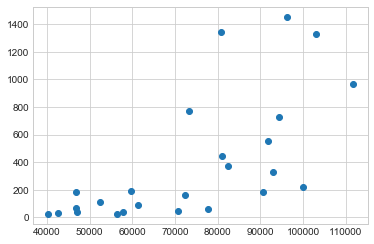

In [232]:
plt.scatter(index["Median_Inc"], index["Res_Parcel"])

In [50]:
"""Final Index created"""

index.to_csv("data_index.csv")